<a href="https://colab.research.google.com/github/n0teventrying/IRN_FP_2024/blob/main/PF_IRN_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Vamos a separar las imagenes por folders nombrados respecto a su clase

In [1]:
import os
import shutil
import re

# Necesitamos una función que extraiga el clima del nombre del archivo, sin importarle el número.
# Por ejemplo, para el archivo "sunny1.jpg", la función debería devolver "sunny".
def extract_weather(filename):
    match = re.search(r"([a-zA-Z]+)\d*\.jpg", filename)
    if match:
        return match.group(1)
    else:
        return None

# Path to the folder containing the images

folder_path = r"C:\Users\think\Downloads\WeatherDataSetOG\dataset2"


# Primero checa cuantas clases hay
main_folders = set()
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        weather = extract_weather(filename)
        if weather:
            main_folders.add(weather)
            if len(main_folders) > 4:
                print("More than 4 main folders created. Breaking the code.") #No sabia si el REGEX iba a funcionar
                break

# Una vez que sabemos cuantas clases hay, creamos las carpetas
for main_folder in main_folders:
    if not os.path.exists(main_folder):
        os.mkdir(main_folder)

# Se llenan los folders con sus imagenes correspondientes
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        weather = extract_weather(filename)
        if weather in main_folders:
            source_file = os.path.join(folder_path, filename)
            destination_folder = os.path.join(weather, filename)
            shutil.move(source_file, destination_folder)


In [4]:
import os
import shutil

# Path to the mother folder

mother_folder = r"C:\Users\think\Documents\GitRepos\IRN_FP_2024"

# Create a new folder to place subfolders into
destination_folder = os.path.join(mother_folder, "WeatherDataSet_Organized")
os.makedirs(destination_folder, exist_ok=True)

# Iterate through each subfolder in the mother folder
for subfolder in os.listdir(mother_folder):
    subfolder_path = os.path.join(mother_folder, subfolder)
    # Check if it's a directory and not the destination folder or WeatherDataSet folder
    if os.path.isdir(subfolder_path) and subfolder != "WeatherDataSet_Organized" and subfolder != "WeatherDataSetOG":
        # Move subfolder into destination folder
        shutil.move(subfolder_path, destination_folder)


In [7]:
import os
from PIL import Image

# Function to get the shape of an image
def get_image_shape(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to count images and determine shapes in a subfolder
def analyze_subfolder(subfolder_path):
    shapes = set()
    num_images = 0
    for filename in os.listdir(subfolder_path):
        if filename.endswith(".jpg"):
            num_images += 1
            image_path = os.path.join(subfolder_path, filename)
            shape = get_image_shape(image_path)
            if shape:
                shapes.add(shape)
    return num_images, shapes

# Path to the folder containing subfolders
parent_folder = r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSet_Organized"

# Iterate through each subfolder
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)
    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        num_images, shapes = analyze_subfolder(subfolder_path)
        print(f"Subfolder: {subfolder}")
        print(f"Number of images: {num_images}")
        print(f"Shapes: {shapes}")


Subfolder: cloudy
Number of images: 300
Shapes: {(255, 192), (229, 173), (252, 168), (1024, 675), (297, 167), (1280, 720), (291, 169), (225, 178), (300, 300), (615, 409), (312, 164), (768, 508), (206, 155), (241, 177), (500, 309), (287, 192), (250, 152), (207, 156), (259, 194), (233, 175), (282, 159), (1000, 750), (268, 178), (260, 174), (254, 170), (267, 189), (272, 185), (700, 421), (298, 185), (800, 377), (500, 329), (270, 178), (284, 177), (261, 175), (281, 187), (299, 168), (238, 158), (290, 174), (600, 254), (520, 362), (278, 157), (229, 152), (247, 252), (241, 181), (600, 400), (260, 194), (251, 167), (270, 180), (317, 167), (285, 171), (222, 167), (272, 153), (203, 163), (231, 154), (318, 159), (263, 168), (243, 162), (350, 200), (206, 152), (223, 168), (205, 154), (342, 171), (264, 178), (226, 170), (800, 500), (205, 300), (275, 172), (1920, 1080), (590, 400), (851, 377), (247, 165), (1024, 576), (720, 476), (272, 182), (213, 160), (303, 160), (224, 224), (276, 173), (271, 186

In [1]:
import os
import random
import shutil
import tensorflow as tf
from PIL import Image

# Set a seed for reproducibility
seed = 42
tf.random.set_seed(seed)
random.seed(seed)

# Function to get the shape of an image
def get_image_shape(image_path):
    try:
        with Image.open(image_path) as img:
            return img.size
    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return None

# Function to count images and determine shapes in a subfolder
def analyze_subfolder(subfolder_path):
    shapes = set()
    num_images = 0
    images = []
    for filename in os.listdir(subfolder_path):
        if filename.endswith(".jpg"):
            num_images += 1
            image_path = os.path.join(subfolder_path, filename)
            shape = get_image_shape(image_path)
            if shape:
                shapes.add(shape)
                images.append(image_path)
    return num_images, shapes, images

# Path to the folder containing subfolders
parent_folder = r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSet_Organized"

# Path to the new balanced dataset folder
balanced_folder = r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSet_Balanced"

# Create the balanced dataset folder if it doesn't exist
os.makedirs(balanced_folder, exist_ok=True)

# Analyze each subfolder
subfolder_info = {}
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)
    if os.path.isdir(subfolder_path):
        num_images, shapes, images = analyze_subfolder(subfolder_path)
        subfolder_info[subfolder] = {
            "num_images": num_images,
            "shapes": shapes,
            "images": images,
            "path": subfolder_path
        }
        print(f"Subfolder: {subfolder}")
        print(f"Number of images: {num_images}")
        print(f"Shapes: {shapes}")

# Determine the minimum number of images in any subfolder
min_num_images = min(info["num_images"] for info in subfolder_info.values())

# Fill up each subfolder in the balanced dataset folder with random images until they reach the minimum number
for subfolder, info in subfolder_info.items():
    # Create corresponding subfolder in the balanced dataset folder
    balanced_subfolder_path = os.path.join(balanced_folder, subfolder)
    os.makedirs(balanced_subfolder_path, exist_ok=True)
    
    # Copy existing images to the balanced subfolder
    for image_path in info["images"]:
        shutil.copy(image_path, balanced_subfolder_path)
    
    all_images = os.listdir(balanced_subfolder_path)
    
    # Add random copies to the balanced subfolder until it reaches the minimum number of images
    while len(all_images) < min_num_images:
        random_index = tf.random.uniform([], minval=0, maxval=len(info["images"]), dtype=tf.int32).numpy()
        random_image = info["images"][random_index]
        new_image_name = f"copy_{len(all_images)}_{os.path.basename(random_image)}"
        new_image_path = os.path.join(balanced_subfolder_path, new_image_name)
        shutil.copy(random_image, new_image_path)
        all_images.append(new_image_name)
    
    print(f"Subfolder {subfolder} in balanced dataset has been filled up to {min_num_images} images.")



Subfolder: cloudy
Number of images: 300
Shapes: {(255, 192), (229, 173), (252, 168), (1024, 675), (297, 167), (1280, 720), (291, 169), (225, 178), (300, 300), (615, 409), (312, 164), (768, 508), (206, 155), (241, 177), (500, 309), (287, 192), (250, 152), (207, 156), (259, 194), (233, 175), (282, 159), (1000, 750), (268, 178), (260, 174), (254, 170), (267, 189), (272, 185), (700, 421), (298, 185), (800, 377), (500, 329), (270, 178), (284, 177), (261, 175), (281, 187), (299, 168), (238, 158), (290, 174), (600, 254), (520, 362), (278, 157), (229, 152), (247, 252), (241, 181), (600, 400), (260, 194), (251, 167), (270, 180), (317, 167), (285, 171), (222, 167), (272, 153), (203, 163), (231, 154), (318, 159), (263, 168), (243, 162), (350, 200), (206, 152), (223, 168), (205, 154), (342, 171), (264, 178), (226, 170), (800, 500), (205, 300), (275, 172), (1920, 1080), (590, 400), (851, 377), (247, 165), (1024, 576), (720, 476), (272, 182), (213, 160), (303, 160), (224, 224), (276, 173), (271, 18

In [2]:
import os
import shutil
import pathlib
import random

# Path to the original parent folder
original_parent_folder = pathlib.Path(r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSet_Organized")

# Path to the new parent folder
new_parent_folder = pathlib.Path(r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSet_Split")

# Function to split data into train, validation, and test sets
def split_data(parent_folder, train_ratio=0.6, validation_ratio=0.2, test_ratio=0.2):
    # Get a list of categories (folder names) within the parent folder
    categories = [category for category in os.listdir(parent_folder) if os.path.isdir(parent_folder / category)]
    
    # Create train, validation, and test directories for each category
    for subset_name in ("train", "validation", "test"):
        subset_dir = new_parent_folder / subset_name
        os.makedirs(subset_dir, exist_ok=True)
        for category in categories:
            os.makedirs(subset_dir / category, exist_ok=True)
    
    # Iterate over each category
    for category in categories:
        # Get list of images in the category folder
        category_folder = parent_folder / category
        images = [image for image in os.listdir(category_folder) if image.endswith('.jpg')]
        random.shuffle(images)  # Shuffle the list of images
        
        # Split the images into train, validation, and test sets
        total_images = len(images)
        train_end = int(total_images * train_ratio)
        validation_end = train_end + int(total_images * validation_ratio)
        
        # Copy images to train, validation, and test directories
        for i, image in enumerate(images):
            source = category_folder / image
            if i < train_end:
                destination = new_parent_folder / "train" / category / image
            elif i < validation_end:
                destination = new_parent_folder / "validation" / category / image
            else:
                destination = new_parent_folder / "test" / category / image
            shutil.copyfile(source, destination)

# Call the function to split the data
split_data(original_parent_folder)


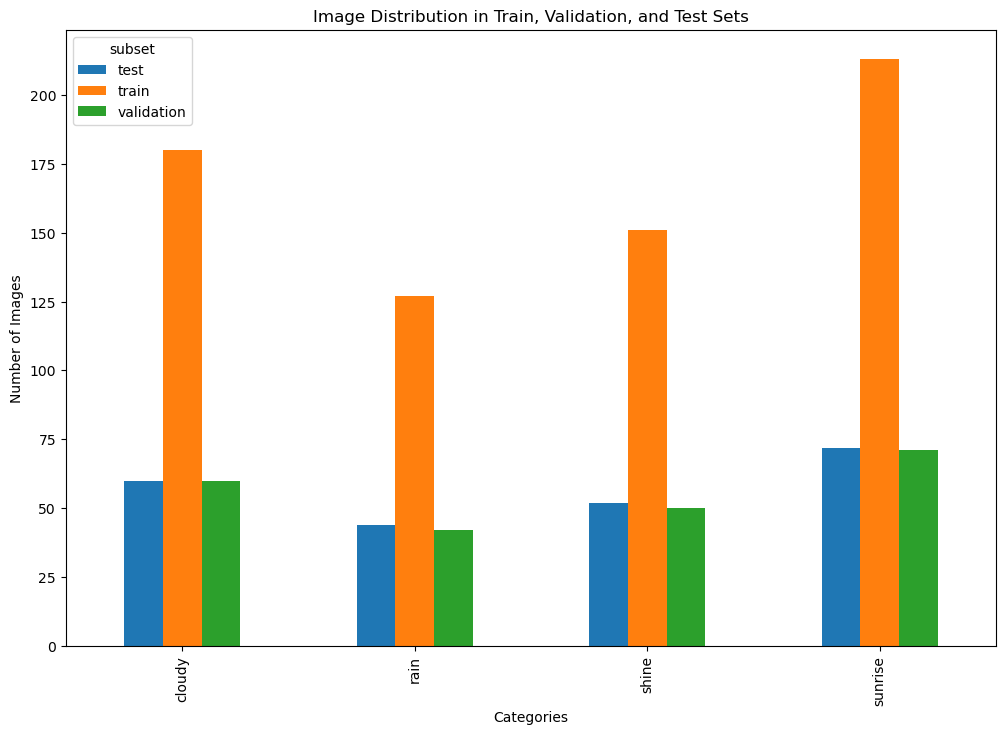

In [3]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

# Path to the new parent folder
new_parent_folder = pathlib.Path(r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSetClean")

# Function to count images in each subset and category
def count_images_in_subfolders(parent_folder):
    subsets = ["train", "validation", "test"]
    data = []
    
    for subset in subsets:
        subset_folder = parent_folder / subset
        for category in os.listdir(subset_folder):
            category_folder = subset_folder / category
            if os.path.isdir(category_folder):
                num_images = len([image for image in os.listdir(category_folder) if image.lower().endswith(('.jpg', '.jpeg', '.png'))])
                data.append({'subset': subset, 'category': category, 'num_images': num_images})
    
    return pd.DataFrame(data)

# Function to plot the distribution as a histogram
def plot_distribution(df):
    pivot_df = df.pivot(index='category', columns='subset', values='num_images').fillna(0)
    pivot_df.plot(kind='bar', figsize=(12, 8))
    
    plt.xlabel('Categories')
    plt.ylabel('Number of Images')
    plt.title('Image Distribution in Train, Validation, and Test Sets')
    plt.xticks(rotation=90)
    plt.show()

# Count images and plot distribution
df = count_images_in_subfolders(new_parent_folder)
plot_distribution(df)


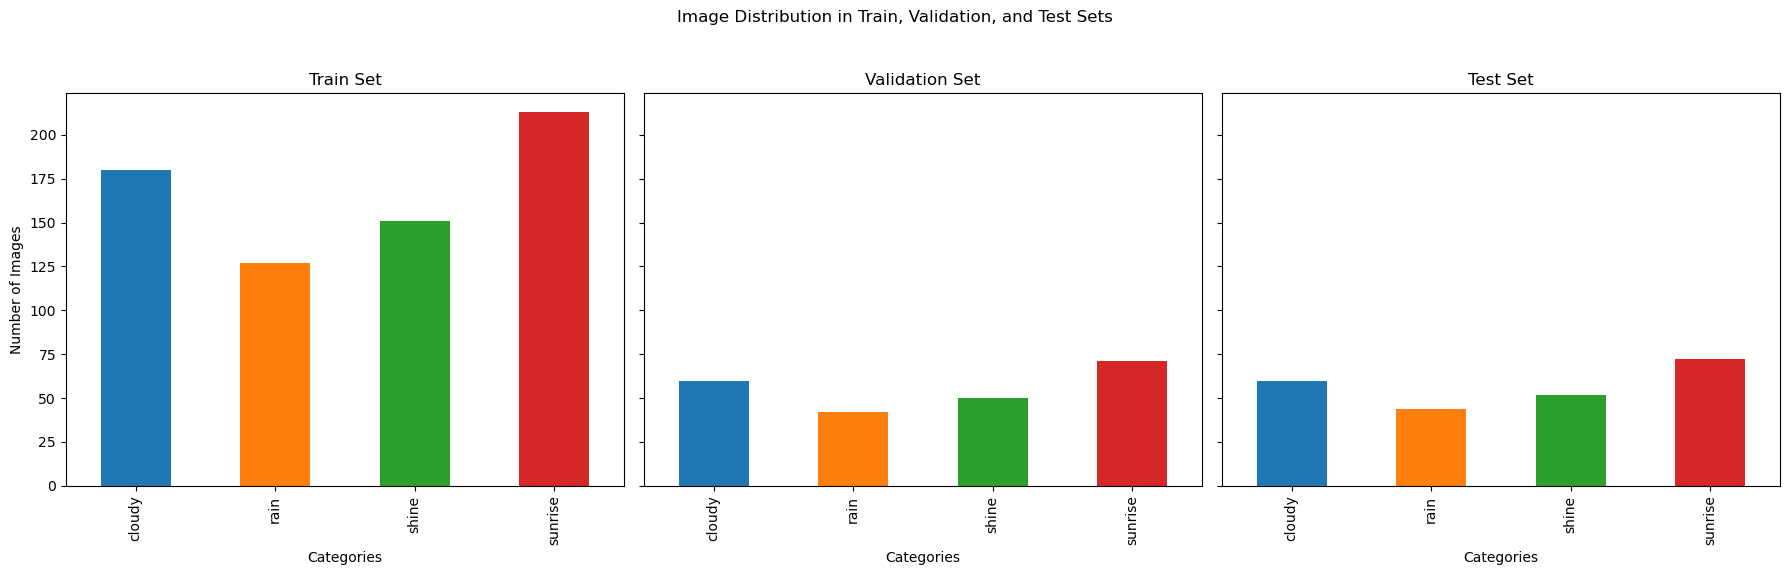

In [6]:
import os
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import random

# Path to the new parent folder
new_parent_folder = pathlib.Path(r"C:\Users\think\Documents\GitRepos\IRN_FP_2024\WeatherDataSetClean")

# Function to count images in each subset and category
def count_images_in_subfolders(parent_folder):
    subsets = ["train", "validation", "test"]
    data = []
    
    for subset in subsets:
        subset_folder = parent_folder / subset
        for category in os.listdir(subset_folder):
            category_folder = subset_folder / category
            if os.path.isdir(category_folder):
                num_images = len([image for image in os.listdir(category_folder) if image.lower().endswith(('.jpg', '.jpeg', '.png'))])
                data.append({'subset': subset, 'category': category, 'num_images': num_images})
    
    return pd.DataFrame(data)

# Function to plot separate histograms for each subset in subplots
def plot_distribution_separate(df):
    subsets = df['subset'].unique()
    fig, axes = plt.subplots(nrows=1, ncols=len(subsets), figsize=(18, 6), sharey=True)
    
    for ax, subset in zip(axes, subsets):
        subset_df = df[df['subset'] == subset]
        num_categories = len(subset_df)
        colors = [plt.cm.tab10.colors[i % 10] for i in range(num_categories)]
        subset_df.plot(kind='bar', x='category', y='num_images', ax=ax, color=colors, legend=False)
        
        ax.set_xlabel('Categories')
        ax.set_ylabel('Number of Images' if subset == 'train' else '')
        ax.set_title(f'{subset.capitalize()} Set')
        ax.set_xticklabels(subset_df['category'], rotation=90)
    
    plt.suptitle('Image Distribution in Train, Validation, and Test Sets')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Count images and plot distribution
df = count_images_in_subfolders(new_parent_folder)
plot_distribution_separate(df)
